# Comparing results from JWST and HST

The goal of this notebook is to compare the mass estimates that can be extracted from JWST and HST in the galaxy M66, located at a distance of 10.1 Mpc.

In [30]:
from XRBID.CMDs import FitSED, PlotSED
from XRBID.Sources import LoadSources, Find, GetDaoPhots
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import os
cd = os.chdir

jwstdir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/JWST/'
hstdir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/'
chandra_hst_dir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-HST/'
chandra_jwst_dir = '/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/'

## HST

In [31]:
DaoCleanMatch = LoadSources(hstdir+'M66_daoclean_matches.frame')

dist = 1.01e+7 # units pc from https://archive.stsci.edu/hlsp/phangs.html#hst_image_products_table
dmod = 5 * np.log10(dist) - 5
cd(hstdir)
DaoCleanPhots = GetDaoPhots(DaoCleanMatch, 
                            photfiles=['photometry_M66_f555w_wfc3_sources.ecsv',
                                       'photometry_M66_f438w_wfc3_sources.ecsv',
                                       'photometry_M66_f814w_wfc3_sources.ecsv',
                                       'photometry_M66_f275w_wfc3_sources.ecsv',
                                       'photometry_M66_f336w_wfc3_sources.ecsv'],
                            idheads=['F555W ID', 'F438W ID', 'F814W ID', 'F275W ID', 'F336W ID'],
                            filters=['F555W', 'F438W', 'F814W', 'F275W', 'F336W'],
                            magheader='aperture_mag_corr', dmod=dmod)

display(DaoCleanPhots)

Reading in sources from /Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/M66_daoclean_matches.frame...
Searching photometry_M66_f555w_wfc3_sources.ecsv
Searching photometry_M66_f438w_wfc3_sources.ecsv
Searching photometry_M66_f814w_wfc3_sources.ecsv
Searching photometry_M66_f275w_wfc3_sources.ecsv
Searching photometry_M66_f336w_wfc3_sources.ecsv


,X,Y,F555W ID,F275W ID,F336W ID,F438W ID,F814W ID,CSC ID,F555W,F555W Err,F438W,F438W Err,F814W,F814W Err,F275W,F275W Err,F336W,F336W Err
0,3728.392237,5731.691614,18393,NaN,95500.0,34799.0,17413.0,2CXO J112014.9+125929,-12.003292,-0.044221,-11.206933,-0.038940,-13.410549,-0.046098,NaN,NaN,-10.554042,-0.046133
1,3730.382900,5734.693669,18431,NaN,NaN,NaN,17413.0,2CXO J112014.9+125929,-11.789961,-0.053822,NaN,NaN,-13.410549,-0.046098,NaN,NaN,NaN,NaN
2,3690.922608,5713.903685,18254,NaN,95118.0,34583.0,NaN,2CXO J112015.0+125928,-10.146309,-0.226729,-9.220154,-0.221970,NaN,NaN,NaN,NaN,-8.344256,-0.309419
3,3693.339708,5721.089782,18303,NaN,NaN,NaN,NaN,2CXO J112015.0+125928,-10.065977,-0.251969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3746.714500,5828.653600,19206,NaN,NaN,35989.0,NaN,2CXO J112014.9+125933,-8.333958,-0.916613,-7.598539,-0.811469,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,3768.771693,8363.063045,34886,203812.0,157738.0,59483.0,NaN,2CXO J112014.9+130113,-5.414429,-0.161998,-5.115863,-0.148391,NaN,NaN,-4.189977,-0.252669,-5.613635,-0.073280
258,4463.710840,2888.783967,1804,48203.0,NaN,NaN,1718.0,2CXO J112013.0+125736,-4.419194,-0.496001,NaN,NaN,-6.093560,-0.407560,-5.281671,-0.067507,NaN,NaN
259,3375.849092,2661.999469,1476,NaN,25603.0,5443.0,1413.0,2CXO J112015.9+125727,-6.330980,-0.055671,-6.398322,-0.042113,-6.038592,-0.206731,NaN,NaN,-6.705100,-0.063543
260,3375.849092,2661.999469,1476,NaN,25753.0,NaN,NaN,2CXO J112015.9+125727,-6.330980,-0.055671,NaN,NaN,NaN,NaN,NaN,NaN,-7.841630,-0.024830


These are HST Images of the 2CXO J112019.5+125958


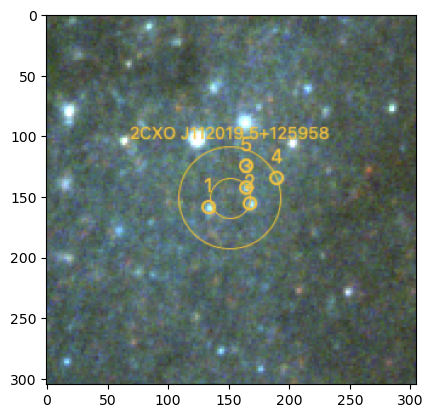

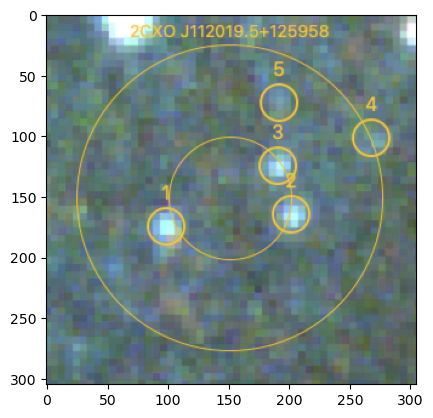

In [32]:
cd(chandra_hst_dir+'XRB_images')
cscid = '2CXO J112019.5+125958'

images = ['M66_XRB_candidates_CXO047_env.png', 'M66_XRB_candidates_CXO047.png',
          chandra_jwst_dir+'XRB_images/M66_XRB_candidates_CXO047_env.png',
          chandra_jwst_dir+'XRB_images/M66_XRB_candidates_CXO047.png']

print(f"These are HST Images of the {cscid}")
image = mpimg.imread(images[0])
plt.imshow(image)
plt.show()

image = mpimg.imread(images[1])
plt.imshow(image)
plt.show()

,X,ID,Y,F555W ID,F275W ID,F336W ID,F438W ID,F814W ID,CSC ID,F555W,F555W Err,F438W,F438W Err,F814W,F814W Err,F275W,F275W Err,F336W,F336W Err
0,2033.527984,1,6447.470681,24140,NaN,114984.0,43873.0,23724.0,2CXO J112019.5+125958,-6.497955,-0.111699,-6.289332,-0.100646,-7.128910,-0.160387,NaN,NaN,-6.417610,-0.110046
1,2050.820440,2,6449.156391,24147,NaN,115009.0,43885.0,23744.0,2CXO J112019.5+125958,-6.351893,-0.126428,-6.121080,-0.114843,-6.909011,-0.199201,NaN,NaN,-6.348513,-0.115224
2,2048.855626,3,6455.911540,24210,NaN,115223.0,43987.0,23799.0,2CXO J112019.5+125958,-6.322838,-0.130914,-6.084594,-0.119687,-6.725759,-0.237587,NaN,NaN,-6.542643,-0.096191
3,2061.746787,4,6459.672417,24236,NaN,115282.0,44027.0,NaN,2CXO J112019.5+125958,-5.800045,-0.211587,-5.289056,-0.243909,NaN,NaN,NaN,NaN,-5.358252,-0.273195
4,2049.129615,5,6464.583353,24275,NaN,NaN,44102.0,NaN,2CXO J112019.5+125958,-5.610789,-0.254206,-5.330681,-0.240352,NaN,NaN,NaN,NaN,NaN,NaN


Finding best-fit model(s)...
DONE


,Unnamed: 0,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,...,F689M,F763M,F845M,F098M,F127M,F139M,F153M,Reduced Chi2,Reduced Chi2 - 1,ID
0,9076,0.0152,0.01508,3.79000,22.063910,2.631053,22.063,4.552,3.9566,2.008,...,-6.583,-6.573,-6.618,-6.614,-6.603,-6.589,-6.592,19.316151,18.316151,1
1,9372,0.0152,0.01508,3.80000,21.835932,2.631014,21.834,4.538,3.9568,2.018,...,-6.547,-6.537,-6.582,-6.578,-6.567,-6.553,-6.556,19.010230,18.010230,1
2,9671,0.0152,0.01508,3.81000,21.610306,2.630974,21.609,4.524,3.9569,2.028,...,-6.511,-6.501,-6.546,-6.542,-6.531,-6.517,-6.520,19.402908,18.402908,1
3,105004,0.0152,0.01508,7.18003,13.309050,2.628373,13.206,4.554,3.9670,1.825,...,-6.542,-6.530,-6.572,-6.555,-6.541,-6.526,-6.528,19.071836,18.071836,1
4,105005,0.0152,0.01508,7.18003,13.309165,2.628373,13.206,4.550,3.9547,1.780,...,-6.587,-6.578,-6.626,-6.618,-6.610,-6.596,-6.600,18.130035,17.130035,1
5,105006,0.0152,0.01508,7.18003,13.309278,2.628373,13.206,4.546,3.9422,1.734,...,-6.631,-6.626,-6.680,-6.681,-6.679,-6.666,-6.673,18.255897,17.255897,1
6,105336,0.0152,0.01508,7.19003,13.110104,2.628263,13.023,4.534,3.9644,1.828,...,-6.505,-6.493,-6.536,-6.521,-6.508,-6.493,-6.496,18.859380,17.859380,1
7,105337,0.0152,0.01508,7.19003,13.110218,2.628263,13.024,4.530,3.9522,1.783,...,-6.550,-6.541,-6.591,-6.583,-6.577,-6.563,-6.568,17.834045,16.834045,1
8,105338,0.0152,0.01508,7.19003,13.110329,2.628263,13.024,4.526,3.9397,1.737,...,-6.592,-6.587,-6.643,-6.646,-6.645,-6.633,-6.640,18.445908,17.445908,1
9,105669,0.0152,0.01508,7.20003,12.914246,2.628150,12.844,4.511,3.9496,1.786,...,-6.512,-6.504,-6.555,-6.549,-6.544,-6.530,-6.536,18.910969,17.910969,1


[98, 105, 110, 125, 127, 139, 140, 153, 160, 218, 225, 275, 336, 390, 390, 410, 438, 467, 475, 547, 555, 606, 621, 625, 689, 763, 775, 814, 845, 422]
[275, 336, 438, 555, 814]


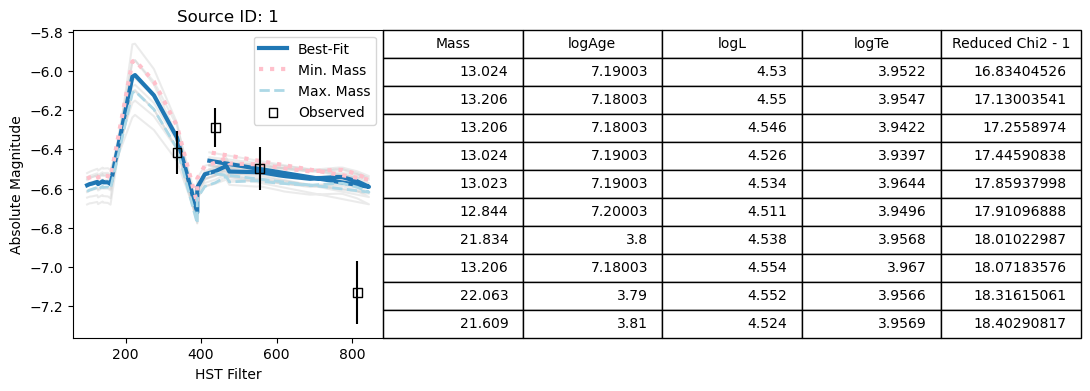

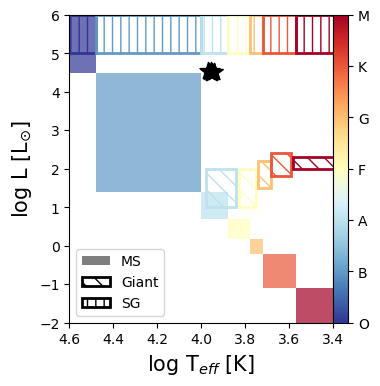

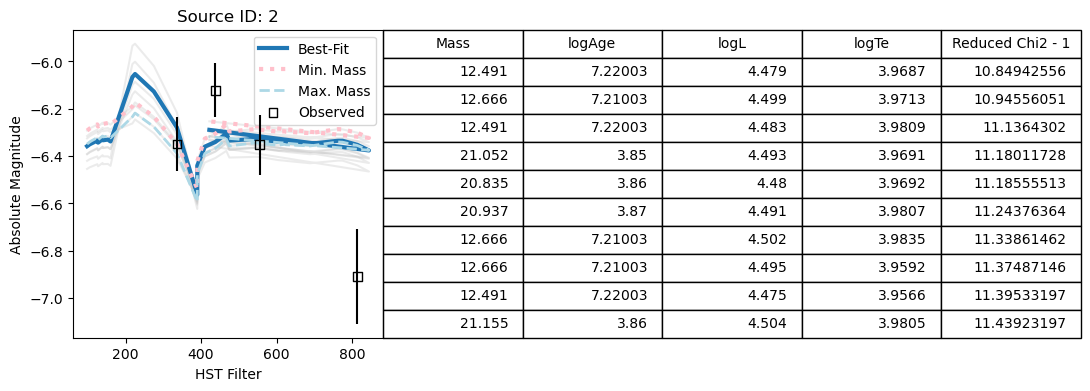

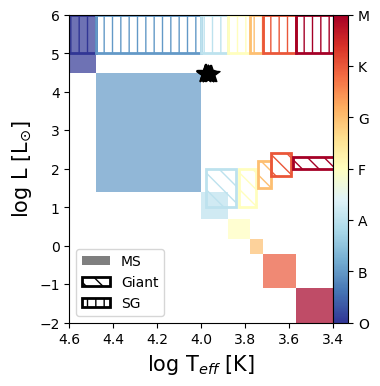

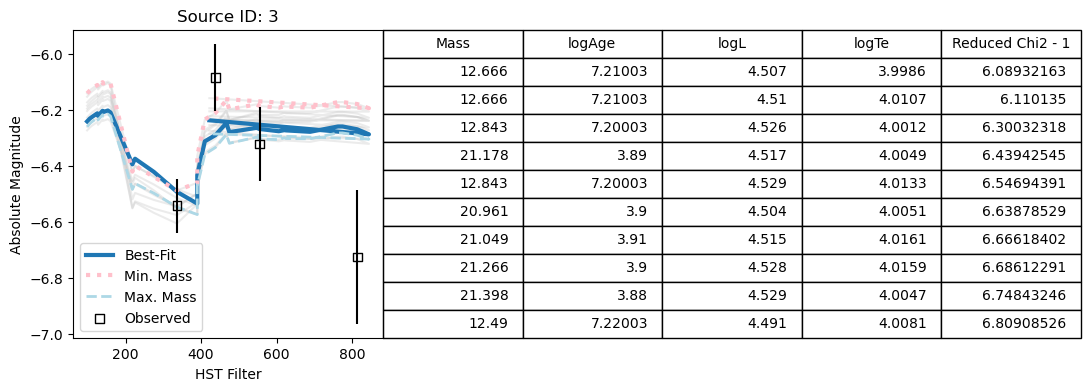

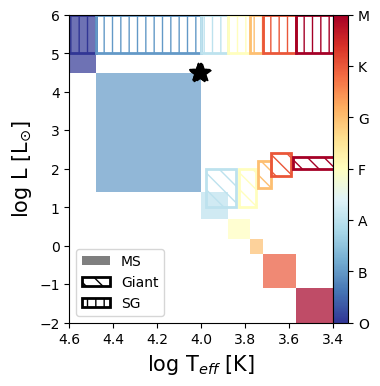

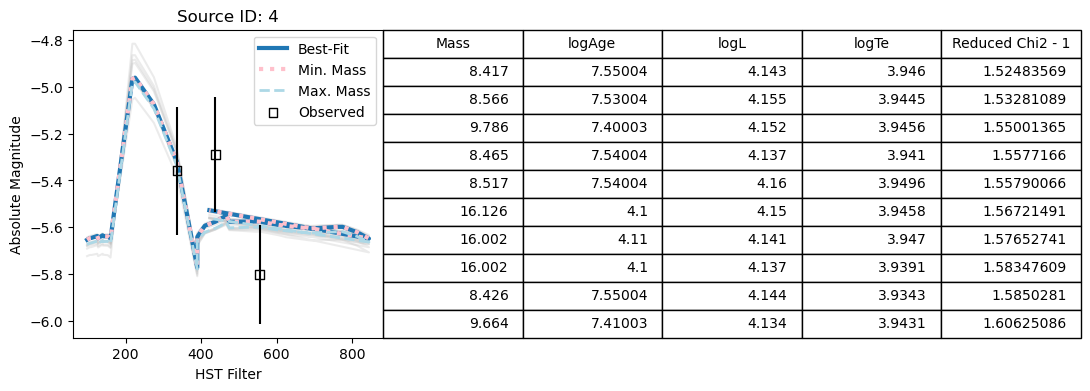

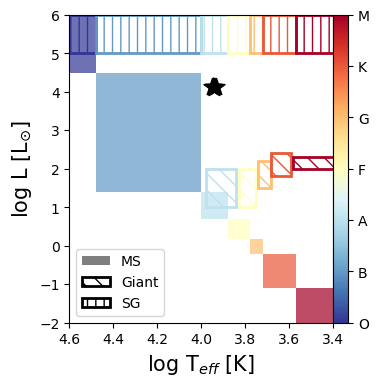

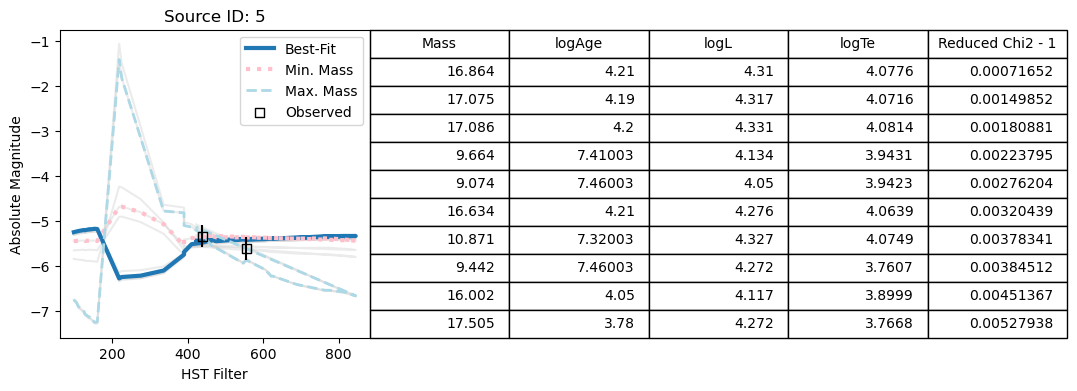

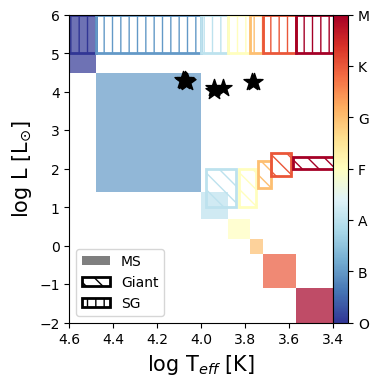

In [33]:
cscid = '2CXO J112019.5+125958'

xrb_hst = Find(DaoCleanPhots, 'CSC ID = 2CXO J112019.5+125958')
xrb_hst.insert(1, 'ID', [i for i in range(1, 6)])
display(xrb_hst)

bestfit = FitSED(df=xrb_hst,
                 instrument='wfc3',
                 idheader='ID',
                 min_models=10)
display(bestfit)

PlotSED(df_sources=xrb_hst,
        df_models=bestfit,
        idheader='ID',
        showHR=True)


## JWST

In [34]:
DaoCleanMatch = LoadSources(chandra_jwst_dir+'test/M66_daoclean_matches.frame')

dist = 10.1e6 # units pc from https://archive.stsci.edu/hlsp/phangs.html#hst_image_products_table
dmod = 5 * np.log10(dist) - 5
cd(jwstdir)
DaoCleanPhots = GetDaoPhots(DaoCleanMatch, 
                            photfiles=['photometry_M66_f200w_nircam_sources.ecsv',
                                       'photometry_M66_f300m_nircam_sources.ecsv',
                                       'photometry_M66_f335m_nircam_sources.ecsv',
                                       'photometry_M66_f360m_nircam_sources.ecsv'],
                            idheads=['F200W ID', 'F300M ID', 'F335M ID', 'F360M ID'],
                            filters=['F200W', 'F300M', 'F335M', 'F360M'],
                            magheader='aperture_mag_corr', dmod=dmod)

display(DaoCleanPhots)

Reading in sources from /Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/test/M66_daoclean_matches.frame...
Searching photometry_M66_f200w_nircam_sources.ecsv
Searching photometry_M66_f300m_nircam_sources.ecsv
Searching photometry_M66_f335m_nircam_sources.ecsv
Searching photometry_M66_f360m_nircam_sources.ecsv


,RA,Dec,F200W ID,F300M ID,F335M ID,F360M ID,CSC ID,F200W,F200W Err,F300M,F300M Err,F335M,F335M Err,F360M,F360M Err
0,170.062403,12.991447,186126,43256.0,39563.0,NaN,2CXO J112014.9+125929,-15.333932,-0.104048,-16.364897,-0.029836,-16.785937,-0.023996,NaN,NaN
1,170.062377,12.991509,186591,43256.0,NaN,45349.0,2CXO J112014.9+125929,-15.246148,-0.112812,-16.364897,-0.029836,NaN,NaN,-16.544547,-0.029958
2,170.062923,12.991314,185199,42999.0,39292.0,44947.0,2CXO J112015.0+125928,-13.942074,-0.296408,-15.186742,-0.088302,-15.453093,-0.081888,-15.436789,-0.083097
3,170.062862,12.991339,185366,43115.0,39406.0,45067.0,2CXO J112015.0+125928,-14.427260,-0.200001,-15.646908,-0.057798,-15.966454,-0.051037,-15.959080,-0.051366
4,170.062923,12.991353,185433,NaN,NaN,NaN,2CXO J112015.0+125928,-14.000382,-0.286530,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,170.054172,12.960079,26276,NaN,NaN,NaN,2CXO J112013.0+125736,-8.724507,-0.421119,NaN,NaN,NaN,NaN,NaN,NaN
1429,170.054284,12.960093,26305,NaN,NaN,NaN,2CXO J112013.0+125736,-8.388021,-0.574976,NaN,NaN,NaN,NaN,NaN,NaN
1430,170.054191,12.960178,26519,6497.0,5610.0,6873.0,2CXO J112013.0+125736,-9.815808,-0.154548,-9.026162,-0.743486,-9.570411,-0.670797,-9.565069,-0.606542
1431,170.054263,12.960223,26624,NaN,5634.0,6902.0,2CXO J112013.0+125736,-7.191804,-1.736334,NaN,NaN,-9.110913,-1.022644,-9.409558,-0.700647


These are JWST Images of the 2CXO J112019.5+125958


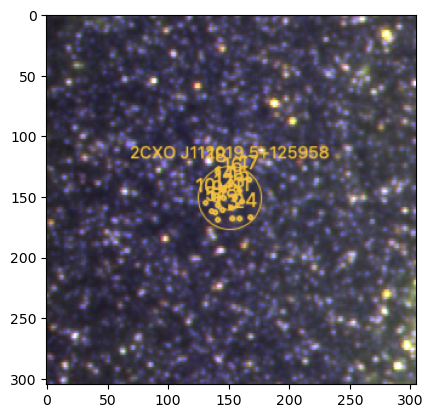

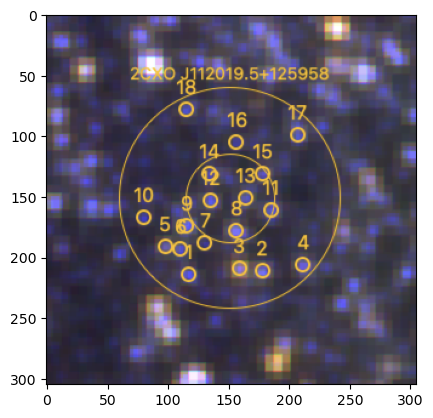

In [35]:
print(f"These are JWST Images of the {cscid}")
image = mpimg.imread(images[2])
plt.imshow(image)
plt.show()

image = mpimg.imread(images[3])
plt.imshow(image)
plt.show()

,RA,Dec,ID,F200W ID,F300M ID,F335M ID,F360M ID,CSC ID,F200Wmag,F200Wmag Err,F300Mmag,F300Mmag Err,F335Mmag,F335Mmag Err,F360Mmag,F360Mmag Err
0,170.081603,12.999265,1,244027,NaN,NaN,NaN,2CXO J112019.5+125958,-9.306588,-0.220990,NaN,NaN,NaN,NaN,NaN,NaN
1,170.081448,12.999272,2,244095,NaN,51397.0,58245.0,2CXO J112019.5+125958,-9.206741,-0.249954,NaN,NaN,-9.352313,-0.622749,-9.644921,-0.430304
2,170.081496,12.999277,3,244167,NaN,51397.0,58245.0,2CXO J112019.5+125958,-8.733542,-0.382865,NaN,NaN,-9.352313,-0.622749,-9.644921,-0.430304
3,170.081362,12.999284,4,244231,55582.0,NaN,NaN,2CXO J112019.5+125958,-9.267607,-0.240388,-7.764100,-2.016442,NaN,NaN,NaN,NaN
4,170.081652,12.999323,5,244465,NaN,NaN,NaN,2CXO J112019.5+125958,-8.758813,-0.362490,NaN,NaN,NaN,NaN,NaN,NaN
5,170.081621,12.999318,6,244466,NaN,NaN,NaN,2CXO J112019.5+125958,-9.022509,-0.286227,NaN,NaN,NaN,NaN,NaN,NaN
6,170.081568,12.999330,7,244535,NaN,NaN,NaN,2CXO J112019.5+125958,-7.605629,-1.067303,NaN,NaN,NaN,NaN,NaN,NaN
7,170.081503,12.999354,8,244723,55691.0,NaN,NaN,2CXO J112019.5+125958,-9.587403,-0.174437,-8.333805,-1.167770,NaN,NaN,NaN,NaN
8,170.081608,12.999365,9,244795,NaN,NaN,NaN,2CXO J112019.5+125958,-9.593553,-0.169765,NaN,NaN,NaN,NaN,NaN,NaN
9,170.081699,12.999383,10,244914,NaN,NaN,NaN,2CXO J112019.5+125958,-8.385961,-0.505928,NaN,NaN,NaN,NaN,NaN,NaN


Finding best-fit model(s)...
DONE


,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,F300Mmag,F335Mmag,F360Mmag,F410Mmag,F430Mmag,F460Mmag,F480Mmag,Reduced Chi2,Reduced Chi2 - 1,ID
0,0.0152,0.01508,7.91397,5.773556,2.617456,5.559,4.411,3.5124,-0.227,7,...,-9.615,-9.751,-9.794,-9.793,-9.730,-9.646,-9.715,0.999336,0.000664,2
1,0.0152,0.01508,8.13897,4.671036,2.612228,4.342,4.362,3.4937,-0.359,8,...,-9.585,-9.784,-9.846,-9.846,-9.776,-9.710,-9.785,1.000435,0.000435,2
2,0.0152,0.01508,8.15697,4.595555,2.611764,4.222,4.355,3.4917,-0.373,8,...,-9.582,-9.790,-9.855,-9.858,-9.788,-9.722,-9.799,0.999744,0.000256,2
3,0.0152,0.01508,8.20197,4.413240,2.610566,3.943,4.241,3.5007,-0.252,8,...,-9.166,-9.320,-9.366,-9.327,-9.241,-9.167,-9.229,0.999087,0.000913,2
4,0.0152,0.01508,8.21997,4.343391,2.610076,4.203,4.354,3.4914,-0.375,8,...,-9.582,-9.792,-9.857,-9.860,-9.791,-9.725,-9.802,1.000617,0.000617,2
5,0.0152,0.01508,8.27397,4.143841,2.608571,3.959,4.239,3.5000,-0.252,8,...,-9.163,-9.319,-9.366,-9.327,-9.239,-9.165,-9.228,0.999256,0.000744,2
6,0.0152,0.01508,8.42696,3.639369,2.603908,3.381,4.209,3.4871,-0.341,8,...,-9.132,-9.348,-9.416,-9.384,-9.293,-9.226,-9.294,1.000681,0.000681,2
7,0.0152,0.01508,8.42696,3.639767,2.603912,2.992,4.273,3.4664,-0.541,8,...,-9.443,-9.808,-9.934,-9.965,-9.885,-9.835,-9.917,0.999974,0.000026,2
8,0.0152,0.01508,8.50796,3.403485,2.601175,2.518,4.210,3.4576,-0.588,8,...,-9.273,-9.687,-9.837,-9.873,-9.784,-9.741,-9.820,0.999451,0.000549,2
9,0.0152,0.01508,8.54396,3.304549,2.599894,2.482,4.186,3.4599,-0.562,8,...,-9.182,-9.575,-9.716,-9.737,-9.644,-9.599,-9.675,0.999957,0.000043,2


[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


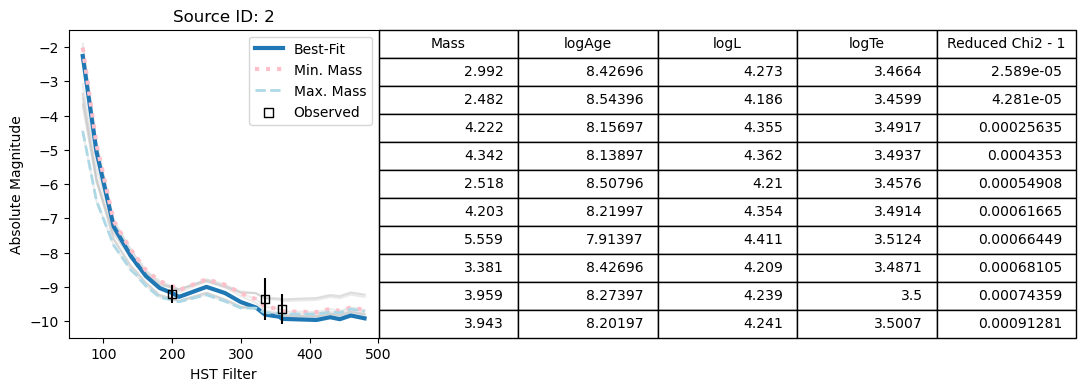

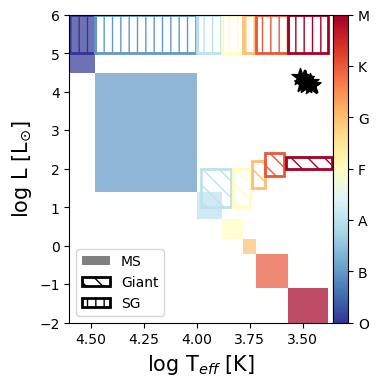

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


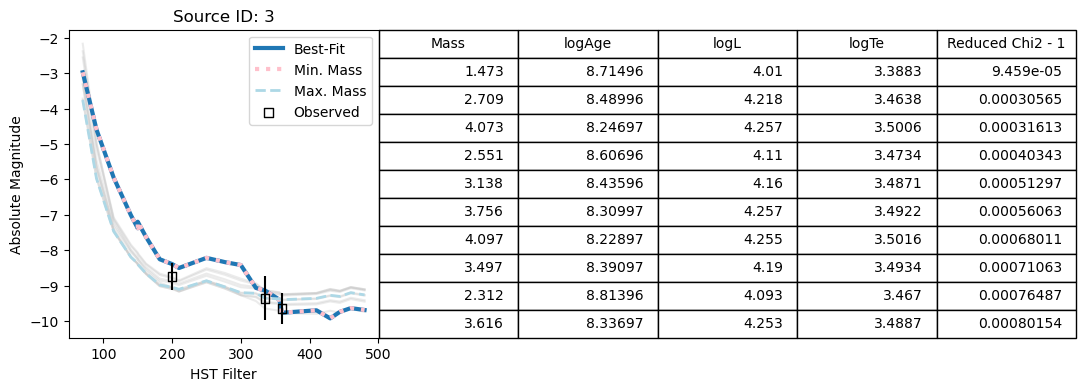

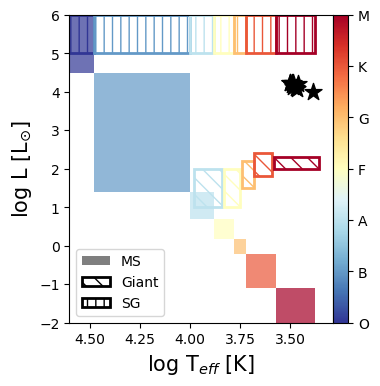

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


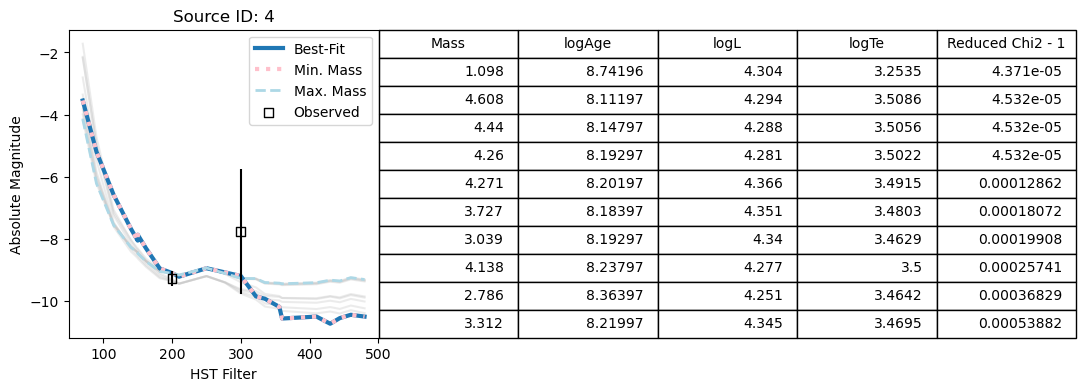

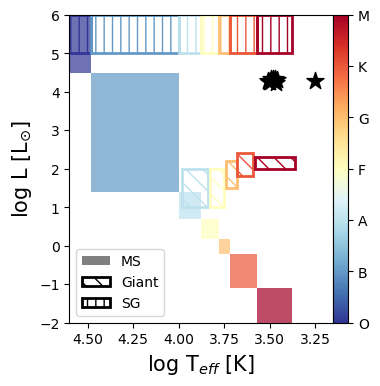

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


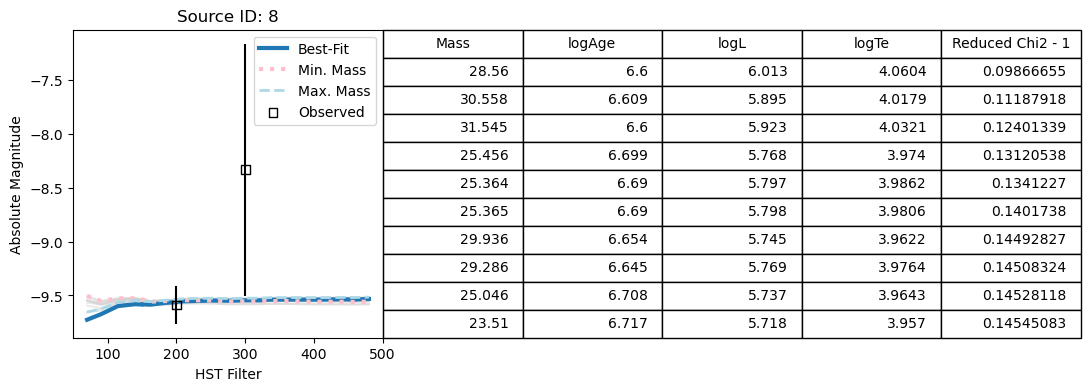

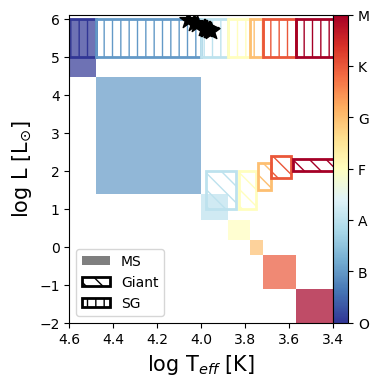

[70, 90, 115, 140, 150, 150, 162, 182, 200, 210, 250, 277, 300, 322, 335, 356, 360, 410, 430, 444, 460, 480]
[200, 300, 335, 360]


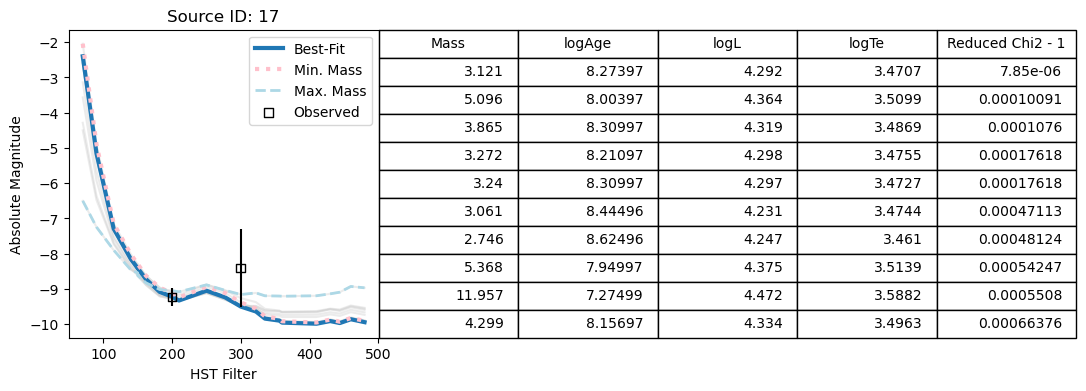

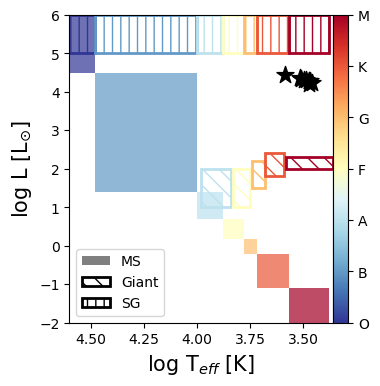

In [36]:
xrb_jwst = Find(DaoCleanPhots, 'CSC ID = 2CXO J112019.5+125958')
xrb_jwst.insert(2, 'ID', [i for i in range(1, len(xrb_jwst)+1)])
# Rename headers to make the df compatible with the CMD data models 
xrb_jwst = xrb_jwst.rename(columns={'F200W': 'F200Wmag',
                                    'F300M': 'F300Mmag',
                                    'F335M': 'F335Mmag',
                                    'F360M': 'F360Mmag',
                                    'F200W Err': 'F200Wmag Err',
                                    'F300M Err': 'F300Mmag Err',
                                    'F335M Err': 'F335Mmag Err',
                                    'F360M Err': 'F360Mmag Err'})
display(xrb_jwst)

bestfit = FitSED(df=xrb_jwst,
                 instrument='nircam',
                 idheader='ID',
                 min_models=10,
                 input_model='/Users/undergradstudent/Research/XRB-Analysis/jwst-models/isochrone-query-step-0_009.dat')
display(bestfit)

xrb_best_models2 = Find(bestfit, ['ID = 2'])
xrb_best_models3 = Find(bestfit, ['ID = 3'])
xrb_best_models4 = Find(bestfit, ['ID = 4'])
xrb_best_models8 = Find(bestfit, ['ID = 8'])
xrb_best_models17 = Find(bestfit, ['ID = 17'])

PlotSED(df_sources=Find(xrb_jwst, ['ID = 2']), df_models=xrb_best_models2, idheader='ID', showHR=True)
PlotSED(df_sources=Find(xrb_jwst, ['ID = 3']), df_models=xrb_best_models3, idheader='ID', showHR=True)
PlotSED(df_sources=Find(xrb_jwst, ['ID = 4']), df_models=xrb_best_models4, idheader='ID', showHR=True)
PlotSED(df_sources=Find(xrb_jwst, ['ID = 8']), df_models=xrb_best_models8, idheader='ID', showHR=True)
PlotSED(df_sources=Find(xrb_jwst, ['ID = 17']), df_models=xrb_best_models17, idheader='ID', showHR=True)